In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
%matplotlib inline

In [2]:
def sampleCovMat(X):
    return 1/X.shape[1]*X.T@X
def MPLaw(rho):
    b = (1+np.sqrt(rho))**2
    a = (1-np.sqrt(rho))**2
    x = np.linspace(a,b,1000)
    y = np.sqrt((b-x)*(x-a))/(2*np.pi*x)
    return x,y
def centerData(X):
    m = X.shape[0]
    mu = np.mean(X,axis=0)
    mu.shape=(1,mu.size,)
    normalized_data = (X - mu)/np.sqrt(m)
    return normalized_data
def nthTotal(s,n):
    return np.sum((s**2)[:n])/np.sum(s**2)*100

In [3]:
X = pd.read_excel("Data_Cortex_Nuclear.xls")
X.drop(X.columns[0],axis=1,inplace=True)
X.dropna(inplace=True)
metadata = X[X.columns[-4:]]
X.drop(metadata,axis=1,inplace=True)
X.shape

(552, 77)

In [4]:
metadata.head(10)

,Genotype,Treatment,Behavior,class
75,Control,Memantine,C/S,c-CS-m
76,Control,Memantine,C/S,c-CS-m
77,Control,Memantine,C/S,c-CS-m
78,Control,Memantine,C/S,c-CS-m
79,Control,Memantine,C/S,c-CS-m
80,Control,Memantine,C/S,c-CS-m
81,Control,Memantine,C/S,c-CS-m
82,Control,Memantine,C/S,c-CS-m
83,Control,Memantine,C/S,c-CS-m
84,Control,Memantine,C/S,c-CS-m


In [5]:
X.head(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.244469,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631
80,0.569918,0.761078,0.343910,2.598085,4.764640,0.203963,0.164440,3.843465,0.193053,1.575707,...,0.247516,0.135867,0.110097,0.127919,0.133818,0.461314,0.114257,0.155924,0.142139,1.506520
81,0.494053,0.666165,0.311962,2.439781,4.256596,0.225564,0.157485,3.728230,0.190021,1.309091,...,0.223662,0.149873,0.104206,0.113798,0.116340,0.443060,0.115848,0.146265,0.150857,1.541363
82,0.485692,0.629683,0.299948,2.317768,4.150104,0.204605,0.151535,3.572320,0.163892,1.290713,...,0.235929,0.144129,0.106386,0.125587,0.136959,0.412938,0.122044,0.160939,0.170004,1.485703
83,0.508725,0.655302,0.305906,2.415705,4.338523,0.206711,0.154362,3.829664,0.173960,1.430067,...,0.241645,0.147835,0.113326,0.125052,0.130162,0.441829,0.119859,0.167853,0.156127,1.509004
84,0.408177,0.543640,0.266223,2.029689,3.387411,0.215282,0.162395,3.074951,0.147956,1.165639,...,0.228342,0.144002,0.107351,0.111412,0.121095,0.371512,0.103811,0.159413,0.165660,1.397439


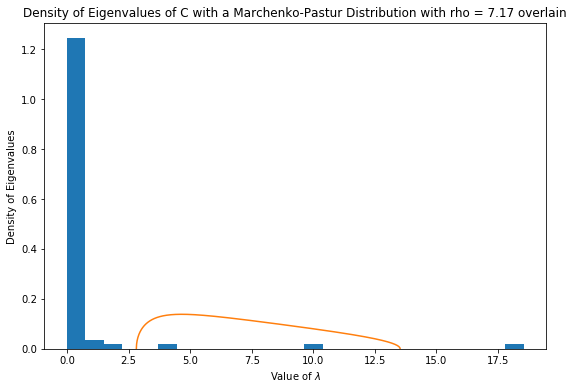

In [6]:
X_ = X.to_numpy()
m,n = X_.shape
rho = m/n
CD = centerData(X_)
C = sampleCovMat(np.sqrt(m)*CD)
evals, evecs = np.linalg.eig(C)
x,y = MPLaw(rho)
plt.figure(figsize=(9,6))
plt.hist(evals,density=True,bins=25)
plt.plot(x,y)
plt.xlabel("Value of $\lambda$")
plt.ylabel("Density of Eigenvalues")
plt.title("Density of Eigenvalues of C with a Marchenko-Pastur Distribution with rho = 7.17 overlain")
plt.savefig("hist.png")
plt.show()

In [7]:
u, s, vt = np.linalg.svd(CD.T, full_matrices = False)

In [8]:
fv = s**2
tv = np.trace(CD.T@CD)
print(np.sum(fv), tv)

5.505801887147333 5.505801887147328


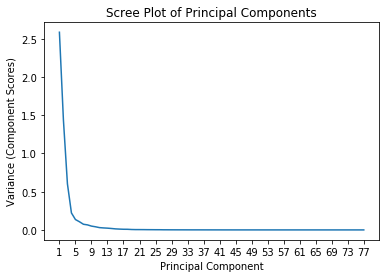

In [9]:
plt.xticks(np.linspace(1,77,20))
plt.xlabel("Principal Component")
plt.ylabel("Variance (Component Scores)")
plt.title("Scree Plot of Principal Components")
plt.plot(np.arange(1,78),s**2)
plt.show()

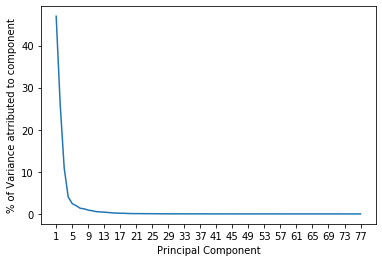

In [10]:
plt.xticks(np.linspace(1,77,20))
plt.xlabel("Principal Component")
plt.ylabel("% of Variance atrributed to component")
sns.lineplot(np.arange(1,78),s**2/np.sum(s**2)*100)
plt.show()

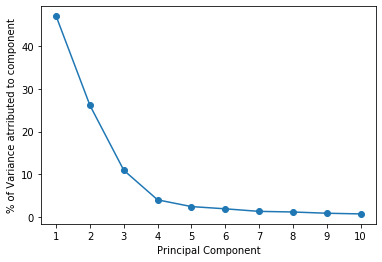

In [11]:
plt.xticks(np.arange(1,11))
plt.xlabel("Principal Component")
plt.ylabel("% of Variance atrributed to component")
plt.plot(np.arange(1,11),(s**2/np.sum(s**2)*100)[:10], '-o')
#plt.savefig("VarPer.png")
plt.show()

In [12]:
totalVar = []
for i in range(77):
    totalVar.append(nthTotal(s,i+1))

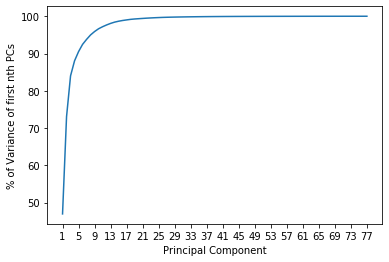

In [13]:
plt.xticks(np.linspace(1,77,20))
plt.xlabel("Principal Component")
plt.ylabel("% of Variance of first nth PCs")
sns.lineplot(np.arange(1,78),totalVar)
plt.show()

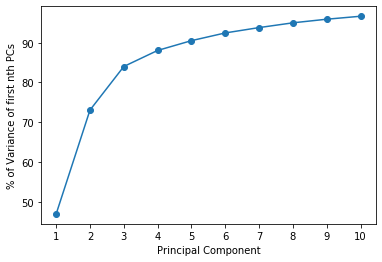

In [14]:
plt.xticks(np.arange(1,11))
plt.xlabel("Principal Component")
plt.ylabel("% of Variance of first nth PCs")
plt.plot(np.arange(1,11),totalVar[:10], "-o")
#plt.savefig("cumDist.png")
plt.show()

In [15]:
np.sum((s**2)[:2])/np.sum(s**2)*100

73.06038025540732

In [16]:
mu=np.mean(X_,axis=0)
Q=u[:,np.array((0,1))]
print(mu.shape,Q.shape)

(77,) (77, 2)


In [17]:
beta_2d = np.dot(Q.T,(np.sqrt(m)*CD).T)

In [18]:
beta_bar=np.dot(Q.T,mu)
beta_bar = beta_bar.reshape(beta_bar.shape[0],1)

In [19]:
X_2d=beta_2d+beta_bar

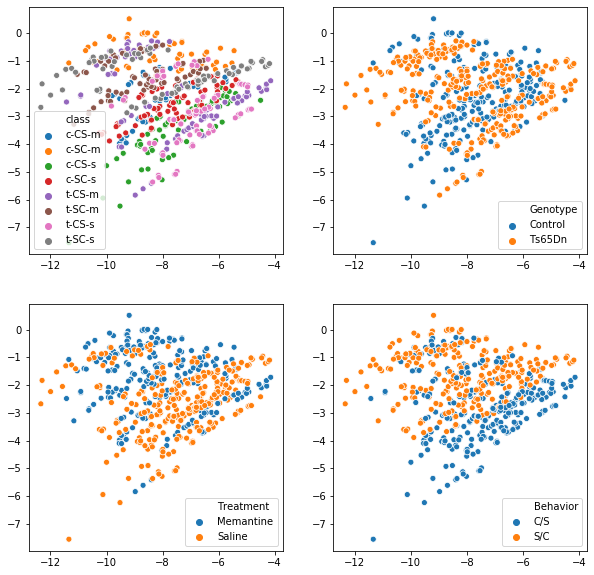

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.scatterplot(X_2d[0,:],X_2d[1,:],hue=metadata['class'])
plt.subplot(222)
sns.scatterplot(X_2d[0,:],X_2d[1,:],hue=metadata['Genotype'])
plt.subplot(223)
sns.scatterplot(X_2d[0,:],X_2d[1,:],hue=metadata['Treatment'])
plt.subplot(224)
sns.scatterplot(X_2d[0,:],X_2d[1,:],hue=metadata['Behavior'])
#plt.savefig('pcplots.png')
plt.show()


# Preprocessing for Classification

In [21]:
def encode8(string):
    if string == 'c-CS-m':
        return 0
    if string == 'c-SC-m':
        return 1
    if string == 'c-CS-s':
        return 2
    if string == 'c-SC-s':
        return 3
    if string == 't-CS-m':
        return 4
    if string == 't-SC-m':
        return 5
    if string == 't-CS-s':
        return 6
    if string == 't-SC-s':
        return 7
def encodeGenotype(string):
    if string == 'Control':
        return -1
    if string == 'Ts65Dn':
        return 1
def encodeBehavior(string):
    if string == 'C/S':
        return -1
    if string == 'S/C':
        return 1
def encodeTreatment(string):
    if string == 'Memantine':
        return -1
    if string == 'Saline':
        return 1

In [22]:
md8 = metadata['class'].apply(encode8).to_numpy()
md8 = md8.reshape(552,1)
mdg = metadata['Genotype'].apply(encodeGenotype).to_numpy()
mdg = mdg.reshape(552,)
mdt = metadata['Treatment'].apply(encodeTreatment).to_numpy()
mdt = mdt.reshape(552,)
mdb = metadata['Behavior'].apply(encodeBehavior).to_numpy()
mdb = mdb.reshape(552,)

# Softmax Regression

In [23]:
def softmax_P(X, W, b):
    """ Calculate the P (probability) matrix of softmax function.
    X: Feature matrix.   Shape: [n,D].
    W: Weight matrix.    Shape: [K,D].
    b: Bias vector.      Shape: [K,1].
    Return the P matrix. Shape: [n,K].
    """
    f         = W.dot(X.T) + b   # Shape: [K,n].
    f         = f - f.max(axis=0, keepdims=True)  # Avoid the big number 
    exp_f     = np.exp(f)        # Shape: [K,n].
    sum_exp_f = exp_f.sum(axis=0, keepdims=True)  # Shape: [1,n].
    P         = (exp_f / sum_exp_f).T
    return P

# Gradient of loss function: L'(W,b).
def L_prime(X, Y, W, b):
    """ L'(W,b) function. 
    X: Feature matrix. Shape: [n,D].
    Y: Label vector.   Shape: [n,1].
    W: Weight matrix.  Shape: [K,D].
    b: Bias vector.    Shape: [K,1].
    Return the gradients: dL/dW (Shape: [K,D]), dL/db (Shape: [K,1]).
    """
    # Get dimensions.
    K, D = W.shape
    n = X.shape[0]
    # Generate the one-hot encoding form of Y.
    Y_onehot =  np.eye(np.unique(Y).shape[0])[Y]                                   # Shape: [n,K].
    Y_onehot = Y_onehot.reshape(Y_onehot.shape[0], Y_onehot.shape[2])

    # Get the P matrix.
    P = softmax_P(X, W, b)                                           # Shape: [n,K].
    # Calculate the gradients: dL/dW, dL/db.
    dL_by_dW = (P-Y_onehot).T@X                                    # Shape: [K,D].
    dL_by_db = (P-Y_onehot).T@np.ones(n)                                    # Shape: [K,1].
    # Return the gradients.
    return dL_by_dW, dL_by_db.reshape(dL_by_db.shape[0],1)

def L(X, Y, W, b):
    """ L(W,b) function. 
    X: Feature matrix. Shape: [n,D].
    Y: Label vector.   Shape: [n,1].
    W: Weight matrix.  Shape: [K,D].
    b: Bias vector.    Shape: [K,1].
    """
    # Get dimensions.
    K, D = W.shape
    n = X.shape[0]
    # Generate the one-hot encoding form of Y.
    Y_onehot =  np.eye(np.unique(Y).shape[0])[Y]                                 # Shape: [n,K].
    Y_onehot = Y_onehot.reshape(Y_onehot.shape[0], Y_onehot.shape[2])

    # Get the P matrix.
    P = softmax_P(X, W, b)                                         # Shape: [n,K].
    L = 0                                        # Shape: Scalar.
    for y, p in zip(Y, P):
        L = L - y*np.log(p[y])
    
    return L

In [24]:
learning_rate = 0.00025
n_iter = 100000       # Number of iterations
K = 8                # Number of classes.
D = X_.shape[1]  # Number of feature dimensions
W = np.zeros((K,D))   # Weight matrix.
b = np.zeros((K,1))   # Bias vector.

# We will keep track of training loss over iterations.
iterations = [0]
L_list = [L(X_, md8, W, b)]
for i in range(n_iter):
    gradient_W, gradient_b = L_prime(X_, md8, W, b)
    W_new = W - learning_rate * gradient_W
    b_new = b - learning_rate * gradient_b
    iterations.append(i+1)
    L_list.append(L(X_, md8, W_new, b_new))
    norm = np.abs(W_new-W).sum() + np.abs(b_new-b).sum()  # L1-norm as jumping out criteria.
    if norm < 0.0005:
        print("Gradient descent has converged after " + str(i) + " iterations.")
        break
    W = W_new
    b = b_new
    
#print ('W matrix: \n' + str(W))
#print ('b vector: \n' + str(b))

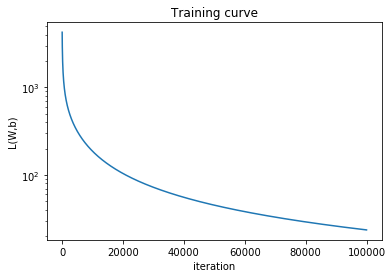

In [25]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(W,b)')
plt.semilogy(iterations, np.array(L_list).reshape(-1, 1))
plt.show()

In [27]:
P_test = softmax_P(X_, W, b) # Shape: [n,K].
yhat_test = P_test.argmax(axis=1).reshape(-1,1)
test_error = 1 - np.sum(yhat_test == md8) / md8.shape[0]
print('Error: {}'.format(test_error))

Error: 0.0


In [30]:
learning_rate = 0.00025
n_iter = 100000       # Number of iterations
K = 8                # Number of classes.
D = 2  # Number of feature dimensions
W2d = np.zeros((K,D))   # Weight matrix.
b2d = np.zeros((K,1))   # Bias vector.

# We will keep track of training loss over iterations.
iterations = [0]
L_list2d = [L(X_2d.T, md8, W2d, b2d)]
for i in range(n_iter):
    gradient_W, gradient_b = L_prime(X_2d.T, md8, W2d, b2d)
    W_new = W2d - learning_rate * gradient_W
    b_new = b2d - learning_rate * gradient_b
    iterations.append(i+1)
    L_list2d.append(L(X_2d.T, md8, W_new, b_new))
    norm = np.abs(W_new-W2d).sum() + np.abs(b_new-b2d).sum()  # L1-norm as jumping out criteria.
    if norm < 0.0005:
        print("Gradient descent has converged after " + str(i) + " iterations.")
        break
    W2d = W_new
    b2d = b_new
    
print ('W matrix: \n' + str(W2d))
print ('b vector: \n' + str(b2d))

Gradient descent has converged after 6714 iterations.
W matrix: 
[[-0.15439272 -0.23325941]
 [-0.139531    2.89087828]
 [ 0.48188391 -1.73037595]
 [ 0.012888   -0.68972614]
 [-0.06174559 -0.32941895]
 [-0.46846648  0.67998483]
 [ 0.54311662 -1.41245649]
 [-0.21375275  0.82437383]]
b vector: 
[[-1.43037445]
 [ 3.13655782]
 [-0.34153145]
 [-0.73283858]
 [-0.24245923]
 [-2.00444446]
 [ 1.09428697]
 [ 0.52080337]]


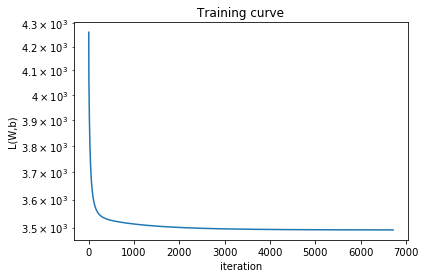

In [31]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(W,b)')
plt.semilogy(iterations, np.array(L_list2d).reshape(-1, 1))
plt.show()

In [32]:
P_test = softmax_P(X_2d.T, W2d, b2d) # Shape: [n,K].
yhat_test = P_test.argmax(axis=1).reshape(-1,1)
test_error = 1 - np.sum(yhat_test == md8) / md8.shape[0]
print('Error: {}'.format(1-test_error))

Error: 0.2554347826086957


# SVM

In [33]:
#Behavior
clfb77 = SVC(gamma="auto")
clfb77.fit(X_,mdb)

clfb2 = SVC(gamma="auto")
clfb2.fit(X_2d.T,mdb)

print(clfb77.score(X_,mdb))
print(clfb2.score(X_2d.T,mdb))

0.9963768115942029
0.7663043478260869


In [34]:
#Genotype
clfg77 = SVC(gamma="auto")
clfg77.fit(X_,mdg)

clfg2 = SVC(gamma="auto")
clfg2.fit(X_2d.T,mdg)

print(clfg77.score(X_,mdg))
print(clfg2.score(X_2d.T,mdg))

0.802536231884058
0.7373188405797102


In [35]:
#Treatment
clft77 = SVC(gamma="auto")
clft77.fit(X_,mdt)

clft2 = SVC(gamma="auto")
clft2.fit(X_2d.T,mdt)

print(clft77.score(X_,mdt))
print(clft2.score(X_2d.T,mdt))

0.8333333333333334
0.7481884057971014
